# Text Classification Using Weka From Dirty Data
To load the dataset into Weka the txt files must be converted to the Attribute Relation File Format (ARFF). This requires two discrete steps:

1. ARFF headers must be added to the text data such that the Weka tool understands the data. The header used is shown below:

<br>
@RELATION webkb-test

@ATTRIBUTE s_label    {student, faculty, project, course}

@ATTRIBUTE s_text     STRING

@DATA
<br>
<br>

2. The text data must be either processed using a conversion algorithm as provided by the Weka tool or one may preprocess the text data manually in a programming language of choice. The latter was chosen to achieve the appropriate format for ARFF.

## Preprocessing the text data for input to Weka
The raw data has only one class and one attribute (text data) when being loaded using ARFF. Columns are delimited by tab characters (\t) and instances are delimited by newlines (\\n). ARFF requires comma (,) delimited columns and newline delimited instances. Lastly, for our text attribute to be loaded in as a string type we must delimit the text attribute with apostrophes ('). The following code achieves these tasks.

In [1]:
import os

In [2]:
def preview(docs):
    for i, doc in enumerate(docs):
        print(i+1, end=' ')
        print(doc[0:50], end='...\n\n')

In [3]:
docs = []
data_dir = './to_weka/txt'
for doc_dir in os.listdir(data_dir):
    doc_path = os.path.join(data_dir, doc_dir)
    doc = open(doc_path, 'r').read()
    docs.append(doc)
    
preview(docs)

1 student,'eric homepag eric wei tsinghua physic fud...

2 student	eric homepag eric wei tsinghua physic fuda...

3 student	brian comput scienc depart univers wiscons...



In [4]:
# replacing all tabs with commas
for i, doc in enumerate(docs.copy()):
    docs[i] = docs[i].replace("\t", ",")

# inserting apostrophes into the text data around each text attribute
new_docs = docs
j = 0
for i, doc in enumerate(docs):
    for char in doc:
        if char == ",":
            new_docs[i] = (new_docs[i][:j+1] + "\'" + new_docs[i][j+1:])
            j+=1
        elif char == "\n":
            new_docs[i] = new_docs[i][:j] + "\'" + new_docs[i][j:]
            j+=1
        j+=1

In [6]:
out0 = open("./to_weka/txt/train.txt", "w")
out1 = open("./to_weka/txt/test.txt", "w")
out0.write(new_docs[0])
out1.write(new_docs[1])
out0.close()
out1.close()

## Classifying Instances in Weka using Naive Bayes and SVM models
### Loading the Dataset into Weka
Now that the dataset is split, tokenized, stemmed and converted to the ARFF format, we may load the training data into Weka:

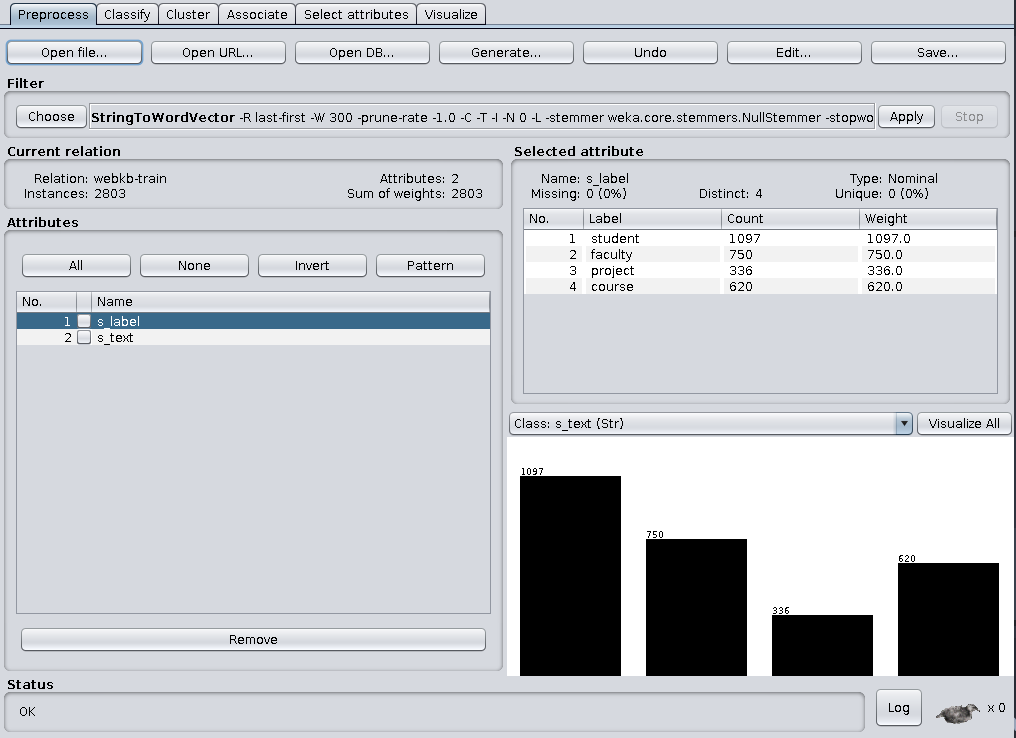

### Applying the StringToWordVector Filter for TF_IDF matrix representation
Now that the data is loaded, we want to turn our s_text attribute, containing all text data associated with each instance, into a TF_IDF vector. For this we use the StringToWordVector filter with the following parameters:

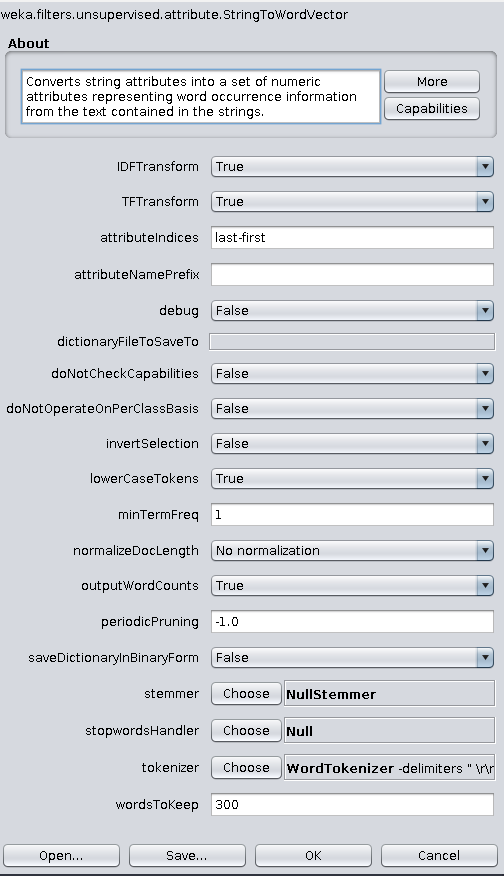
Note that wordsToKeep is set to 300. Due to the lower complexity this makes for a relatively quick to train/evaluate model, however it might reduce the accuracy of classification, as we will see later.

### Performing Attribute Selection
With the data now in TF_IDF matrix form, where each attribute is a numerical value, we perform attribute selection:

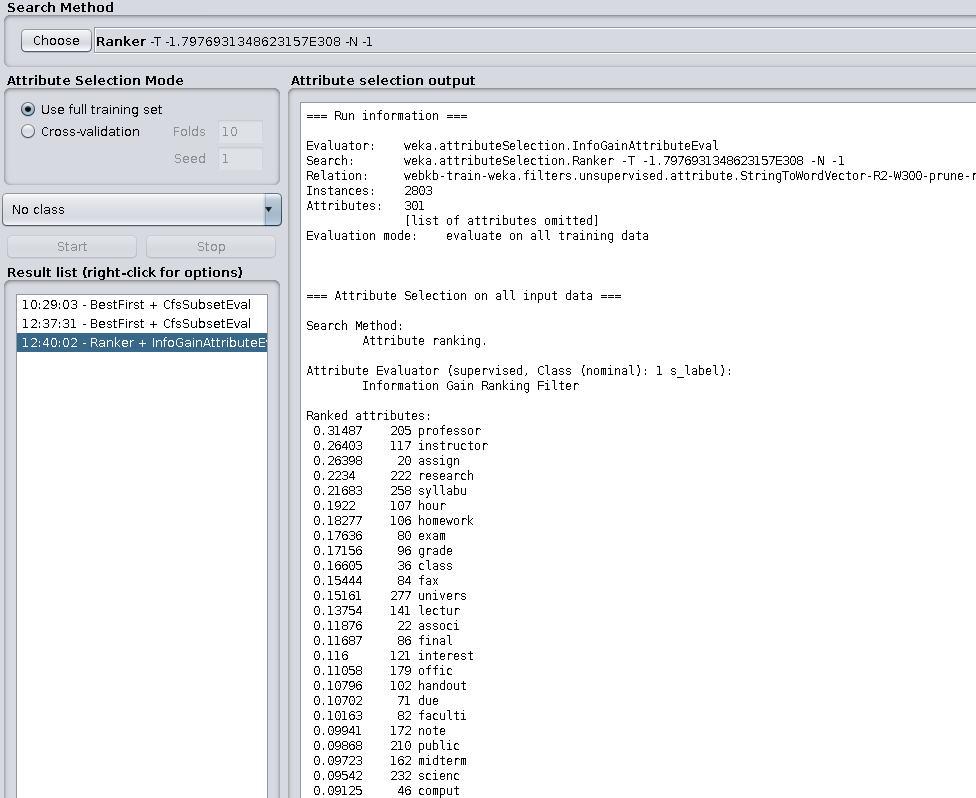

The ranker search method was chosen to display which attributes provide the largest information gain, thanks to the InfoGainAttributeEval attribute evaluator. The ten attributes with the highest are then selected:

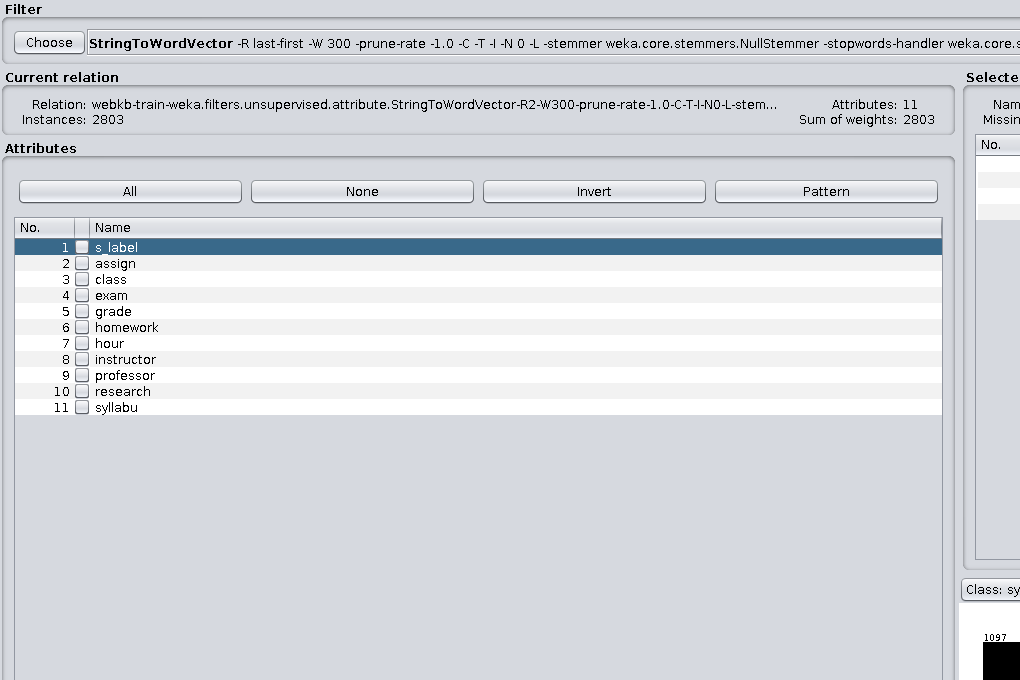

### Evaluating training data using Naive Bayes
<br>
Parameters for Naive Bayes classifier:
<br>

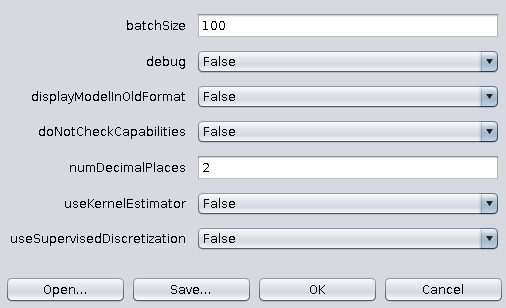

<br>

#### With only ten attributes, what does performance look like?

<br>

##### 10-FOLD CROSS VALIDATION: 

<br>
=== Summary ===

Correctly Classified Instances        1692              
60.3639 %

Incorrectly Classified Instances      1111              
39.6361 %    

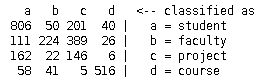
<br>
##### EVALUATION ON TEST SET: 
<br>

=== Summary ===

Correctly Classified Instances        1613               
57.5455 %

Incorrectly Classified Instances      1190              
42.4545 %

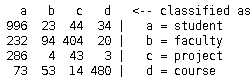
<br>
These results aren't so bad, but can we do better?

#### Lets go back and use the original set of 300 words: 
<br>

##### 10 FOLD CROSS VALIDATION:

<br>
=== Summary ===

Correctly Classified Instances        1988               
70.924  %

Incorrectly Classified Instances       815               
29.076  %

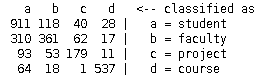


<br>

##### EVALUATION ON TEST SET: 

<br>

=== Summary ===

Correctly Classified Instances         946               
67.765  %

Incorrectly Classified Instances       450               
32.235  %

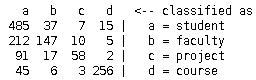

<br>
By adding 290 words, chosen based upon their term frequency during the StringToWordVector filtering processing, we gain roughly 10% better classification accuracy against the test data. Those ten attributes selected based upon their information gain did a good job at explaining the variability between classes.

### Evaluating training data using SVM
<br>

Parameters for SVM classifier:

<br>

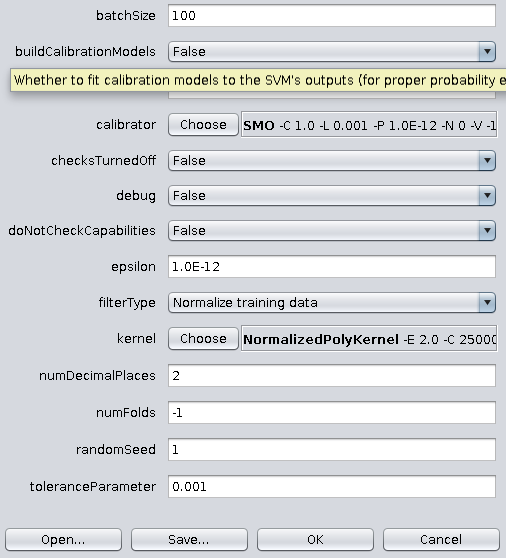

<br>

#### Using 10 attributes:

##### 10 FOLD CROSS VALIDATION:
=== Summary ===

Correctly Classified Instances        2120               
75.6333 %

Incorrectly Classified Instances       683               
24.3667 %

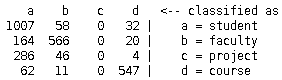


##### EVALUATION ON TEST SET:
=== Summary ===

Correctly Classified Instances        1047              
75      %

Incorrectly Classified Instances       349               
25      %

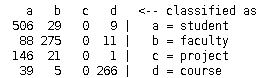


#### Using 300 attributes:

##### 10 FOLD CROSS VALIDATION:
=== Summary ===

Correctly Classified Instances        2548               
90.9026 %

Incorrectly Classified Instances       255                
9.0974 %

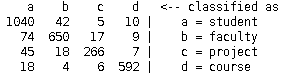

##### EVALUATION ON TEST SET:
=== Summary ===

Correctly Classified Instances        1263               
90.4728 %

Incorrectly Classified Instances       133               
9.5272 %

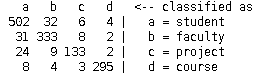

As the results show, SVM with only 10 attributes does a comparable job the the naive bayes classifier with 300. That is quite the improvement! Comparing the two, SVM is clearly a superior yet much more computationally expensive model. 

Furthermore, SVM demonstrates equivalent performance between 10 fold cross validation and test set evaluation, while Naive Bayes has worse performance when evaluating against the test set.